<a href="https://colab.research.google.com/github/teukumhfs/TechnicianServiceAnalysis/blob/main/Technician_Service_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Technician Service Analysis

**Analyzing Technician Services: Satellite Television Company in Indonesia using python**

This analysis reviews technician service efficiency for a major Indonesian satellite TV company between December 2021 and January 2022. It covers vendor performance, common service issues, and SLA compliance.
The focus is on vendor analysis, service type distribution, and service level agreemen (SLA)

In [1]:
# @title Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# @title Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# @title Setup DataFrame paths
path = '/content/drive/MyDrive/dataset/techcomp/servicecust.csv'

In [4]:
# @title Customer Service Data
df = pd.read_csv(path)
df.head()

,CUSTOMER_ID,SERVICE_TYPE,CREATED_DATE,CLOSED_DATE,STATUS,BRANCH,REGION,EMPLOYEE_ID,VENDOR,CONTACT_ID,CUSTOMER_SINCE
0,CID40302465942742,NO SIGNAL,31/12/2021,01/01/2022,Resolved,Bandung,JAWA BARAT 1,V0100055,V01,74409994,21/12/2017
1,CID03110393786702,CHANNEL FROZEN,31/12/2021,01/01/2022,Resolved,Samarinda,KALIMANTAN 2,V0100180,V01,74411506,24/05/2018
2,CID03300061749200,NO SIGNAL,24/12/2021,01/01/2022,Resolved,Pekanbaru,SUMATERA 2,V0200107,V02,74409293,10/06/2013
3,CID03301447043702,NO SIGNAL,31/12/2021,01/01/2022,Resolved,Jakarta,JAKARTA,V0221120303,V02,74415961,29/12/2007
4,CID31110281676112,NO SIGNAL,30/12/2021,01/01/2022,Resolved,Jombang,JAWA TIMUR,V0100127,V01,74551925,20/09/2013


**Disclaimer**

The data provided in the column below has undergone modifications to protect the privacy.

```
CUSTOMER_ID, EMPLOYEE_ID, VENDOR, and CONTACT_ID
```
These changes were made in compliance with data protection regulations.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CUSTOMER_ID     299 non-null    object
 1   SERVICE_TYPE    299 non-null    object
 2   CREATED_DATE    299 non-null    object
 3   CLOSED_DATE     299 non-null    object
 4   STATUS          299 non-null    object
 5   BRANCH          299 non-null    object
 6   REGION          299 non-null    object
 7   EMPLOYEE_ID     299 non-null    object
 8   VENDOR          299 non-null    object
 9   CONTACT_ID      299 non-null    int64 
 10  CUSTOMER_SINCE  299 non-null    object
dtypes: int64(1), object(10)
memory usage: 25.8+ KB


In [6]:
# @title Total Data
count = len(df)
print("Total Data:", count)

Total Data: 299


In [7]:
# @title Modify df by dropping CLOSED_DATE

def drop_column_if_exists(data_frame, column_name):
    if column_name in data_frame.columns:
        modified_df = data_frame[data_frame.columns[~data_frame.columns.isin([column_name])]]
    else:
        modified_df = data_frame.copy()
    return modified_df

# Drop the 'CLOSED_DATE' column if it exists
df_modified = drop_column_if_exists(df, 'CLOSED_DATE')

# Display the modified DataFrame

df_modified.head()

,CUSTOMER_ID,SERVICE_TYPE,CREATED_DATE,STATUS,BRANCH,REGION,EMPLOYEE_ID,VENDOR,CONTACT_ID,CUSTOMER_SINCE
0,CID40302465942742,NO SIGNAL,31/12/2021,Resolved,Bandung,JAWA BARAT 1,V0100055,V01,74409994,21/12/2017
1,CID03110393786702,CHANNEL FROZEN,31/12/2021,Resolved,Samarinda,KALIMANTAN 2,V0100180,V01,74411506,24/05/2018
2,CID03300061749200,NO SIGNAL,24/12/2021,Resolved,Pekanbaru,SUMATERA 2,V0200107,V02,74409293,10/06/2013
3,CID03301447043702,NO SIGNAL,31/12/2021,Resolved,Jakarta,JAKARTA,V0221120303,V02,74415961,29/12/2007
4,CID31110281676112,NO SIGNAL,30/12/2021,Resolved,Jombang,JAWA TIMUR,V0100127,V01,74551925,20/09/2013


In [8]:
# @title Format CLOSED_DATE

def create_column(data_frame, column_name, target_column):
    if column_name in data_frame.columns:
        new_columns = data_frame[[column_name, target_column]]
    else:
        new_columns = data_frame.copy()
    return new_columns

# Extract 'CUSTOMER_ID' and 'CLOSED_DATE' columns
new_columns = create_column(df, 'CUSTOMER_ID', 'CLOSED_DATE')

In [10]:
new_columns.to_string(index=False)

'      CUSTOMER_ID      CLOSED_DATE\nCID40302465942742       01/01/2022\nCID03110393786702       01/01/2022\nCID03300061749200       01/01/2022\nCID03301447043702       01/01/2022\nCID31110281676112       01/01/2022\nCID36110702123200       01/01/2022\nCID40302116187339       01/01/2022\nCID40301298704117       01/01/2022\nCID31302840652702       01/01/2022\nCID36300333244112       01/01/2022\nCID03110607381702       01/01/2022\nCID31302225983200       01/02/2022\nCID31300092592100       01/02/2022\nCID40301619045366       01/02/2022\nCID03508980564117       01/02/2022\nCID31110671896100       01/02/2022\nCID36301654994112       01/02/2022\nCID40303681084223       01/02/2022\nCID31301796635775       01/02/2022\nCID40503605441702       01/02/2022\nCID03507868660117       01/02/2022\nCID40303354793702       01/02/2022\nCID03302214900702       01/02/2022\nCID40503976450112       01/02/2022\nCID31300912402702       01/02/2022\nCID40303335555702       01/03/2022\nCID03302720552200       01/

In [11]:
new_columns.tail()

,CUSTOMER_ID,CLOSED_DATE
294,CID40512323303742,01/28/2022 20:20
295,CID40303145131112,01/29/2022 13:13
296,CID40511826010742,01/29/2022 14:14
297,CID31512639076112,01/29/2022 19:19
298,CID03505859011117,01/29/2022 22:22


In [ ]:
df_cd = new_columns

# Convert 'CLOSED_DATE' column to datetime if it's not already
df_cd['CLOSED_DATE'] = pd.to_datetime(df_cd['CLOSED_DATE'])

# Create a new column with formatted dates
df_cd['FORMATED_CLOSED_DATE'] = df_cd['CLOSED_DATE'].dt.strftime('%d/%m/%Y %H:%M:%S')

In [14]:
df_cd.head()

,CUSTOMER_ID,CLOSED_DATE,FORMATED_CLOSED_DATE
0,CID40302465942742,2022-01-01,01/01/2022 00:00:00
1,CID03110393786702,2022-01-01,01/01/2022 00:00:00
2,CID03300061749200,2022-01-01,01/01/2022 00:00:00
3,CID03301447043702,2022-01-01,01/01/2022 00:00:00
4,CID31110281676112,2022-01-01,01/01/2022 00:00:00


In [16]:
# Remove CLOSED_DATE column to show only CUSTOMER_ID and FORMATED_CLOSED_DATE
df_new_format = df_cd.drop(columns=['CLOSED_DATE'])

# Print the DataFrame after dropping the column
print(df_new_format)

           CUSTOMER_ID FORMATED_CLOSED_DATE
0    CID40302465942742  01/01/2022 00:00:00
1    CID03110393786702  01/01/2022 00:00:00
2    CID03300061749200  01/01/2022 00:00:00
3    CID03301447043702  01/01/2022 00:00:00
4    CID31110281676112  01/01/2022 00:00:00
..                 ...                  ...
294  CID40512323303742  28/01/2022 20:20:00
295  CID40303145131112  29/01/2022 13:13:00
296  CID40511826010742  29/01/2022 14:14:00
297  CID31512639076112  29/01/2022 19:19:00
298  CID03505859011117  29/01/2022 22:22:00

[299 rows x 2 columns]


In [17]:
# @title Merge dataframe
merged_df = df_new_format.merge(df_modified, on='CUSTOMER_ID', how='left')

In [18]:
merged_df.tail()

,CUSTOMER_ID,FORMATED_CLOSED_DATE,SERVICE_TYPE,CREATED_DATE,STATUS,BRANCH,REGION,EMPLOYEE_ID,VENDOR,CONTACT_ID,CUSTOMER_SINCE
296,CID40512323303742,28/01/2022 20:20:00,DSD/HD PROBLEM,28/01/2022,Resolved,Cilincing,JAKARTA,V01AMS081,V01,74902803,16/03/2010
297,CID40303145131112,29/01/2022 13:13:00,NO SIGNAL,28/01/2022,Resolved,Bandung,JAWA BARAT 1,V0300133,V03,74908238,05/10/2010
298,CID40511826010742,29/01/2022 14:14:00,DSD/HD PROBLEM,27/01/2022,Resolved,Pekanbaru,SUMATERA 2,V0300132,V03,74909235,26/03/2018
299,CID31512639076112,29/01/2022 19:19:00,DSD/HD PROBLEM,27/01/2022,Resolved,Jakarta,JAKARTA,V0100089,V01,74911562,16/09/2011
300,CID03505859011117,29/01/2022 22:22:00,DSD SWAP,29/01/2022,Resolved,Yogyakarta,JAWA TENGAH,V03ZZS003,V03,74910513,24/07/2014


In [19]:
# Rename FORMATED_CLOSED_DATE to CLOSED_DATE on merge df
merged_df.rename(columns={'FORMATED_CLOSED_DATE': 'CLOSED_DATE'}, inplace=True)

merged_df.tail()

,CUSTOMER_ID,CLOSED_DATE,SERVICE_TYPE,CREATED_DATE,STATUS,BRANCH,REGION,EMPLOYEE_ID,VENDOR,CONTACT_ID,CUSTOMER_SINCE
296,CID40512323303742,28/01/2022 20:20:00,DSD/HD PROBLEM,28/01/2022,Resolved,Cilincing,JAKARTA,V01AMS081,V01,74902803,16/03/2010
297,CID40303145131112,29/01/2022 13:13:00,NO SIGNAL,28/01/2022,Resolved,Bandung,JAWA BARAT 1,V0300133,V03,74908238,05/10/2010
298,CID40511826010742,29/01/2022 14:14:00,DSD/HD PROBLEM,27/01/2022,Resolved,Pekanbaru,SUMATERA 2,V0300132,V03,74909235,26/03/2018
299,CID31512639076112,29/01/2022 19:19:00,DSD/HD PROBLEM,27/01/2022,Resolved,Jakarta,JAKARTA,V0100089,V01,74911562,16/09/2011
300,CID03505859011117,29/01/2022 22:22:00,DSD SWAP,29/01/2022,Resolved,Yogyakarta,JAWA TENGAH,V03ZZS003,V03,74910513,24/07/2014


In [20]:
# @title Create df_cs variable
df_cs = merged_df

# this variable will be used to replace df data and prevent original data changing

In [143]:
# @title Vendor Counts
df_vendor_counts = df_cs.groupby(['SERVICE_TYPE', 'VENDOR']).size().reset_index(name='count')
print(df_vendor_counts)

          SERVICE_TYPE VENDOR  count
0       CHANNEL FROZEN    V01     15
1       CHANNEL FROZEN    V02     11
2       CHANNEL FROZEN    V03     18
3             DSD SWAP    V01      4
4             DSD SWAP    V02      4
5             DSD SWAP    V03      5
6       DSD/HD PROBLEM    V01     14
7       DSD/HD PROBLEM    V02      3
8       DSD/HD PROBLEM    V03     20
9    HW SERIAL PROBLEM    V03      1
10        INSTALLATION    V01      1
11        INSTALLATION    V03      2
12           NO SIGNAL    V01     55
13           NO SIGNAL    V02     52
14           NO SIGNAL    V03     79
15         ODU PROBLEM    V01      2
16         ODU PROBLEM    V02      1
17         ODU PROBLEM    V03      3
18          RC PROBLEM    V02      1
19          RC PROBLEM    V03      2
20  RELOCATING ODU/DSD    V01      1
21  RELOCATING ODU/DSD    V02      1
22  RELOCATING ODU/DSD    V03      5
23          VC PROBLEM    V03      1


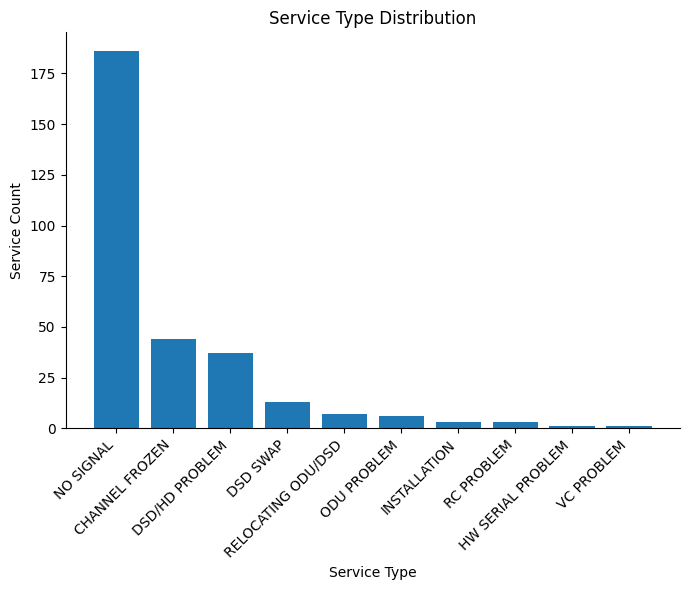

In [144]:
# @title Service Type Distribution
service_type_distribution = df_vendor_counts.groupby('SERVICE_TYPE')['count'].sum().reset_index()
service_type_distribution = service_type_distribution.sort_values(by='count', ascending=False)

plt.figure(figsize=(7, 6))
plt.bar(service_type_distribution['SERVICE_TYPE'], service_type_distribution['count'])
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Service Type')
plt.ylabel('Service Count')
plt.title('Service Type Distribution')
plt.tight_layout()
plt.show()

In [23]:
# Service type distribution counts
print(service_type_distribution)

         SERVICE_TYPE  count
5           NO SIGNAL    186
0      CHANNEL FROZEN     44
2      DSD/HD PROBLEM     37
1            DSD SWAP     13
8  RELOCATING ODU/DSD      7
6         ODU PROBLEM      6
4        INSTALLATION      3
7          RC PROBLEM      3
3   HW SERIAL PROBLEM      1
9          VC PROBLEM      1


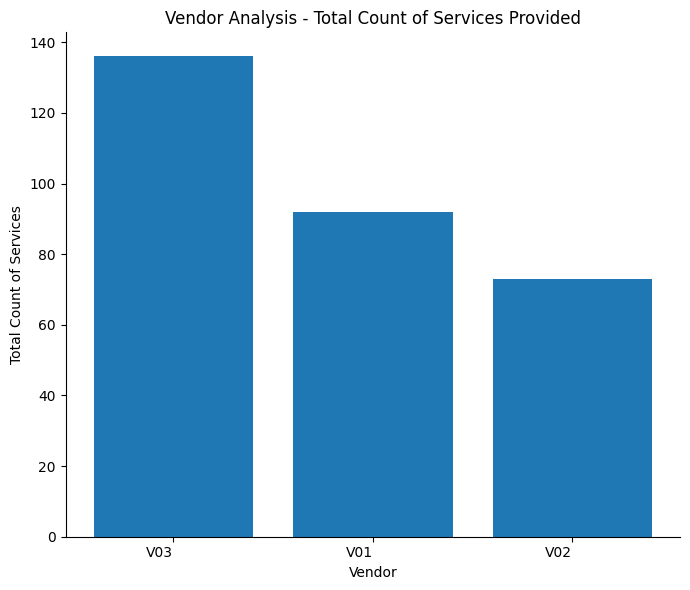

In [145]:
# @title Vendor Analysis
vendor_analysis = df_vendor_counts.groupby('VENDOR')['count'].sum().reset_index()
vendor_analysis = vendor_analysis.sort_values(by='count', ascending=False)

plt.figure(figsize=(7, 6))
plt.bar(vendor_analysis['VENDOR'], vendor_analysis['count'])
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xticks(ha='right')
plt.xlabel('Vendor')
plt.ylabel('Total Count of Services')
plt.title('Vendor Analysis - Total Count of Services Provided')
plt.tight_layout()
plt.show()

In [146]:
# Vendor count of services
print(vendor_analysis)

  VENDOR  count
2    V03    136
0    V01     92
1    V02     73


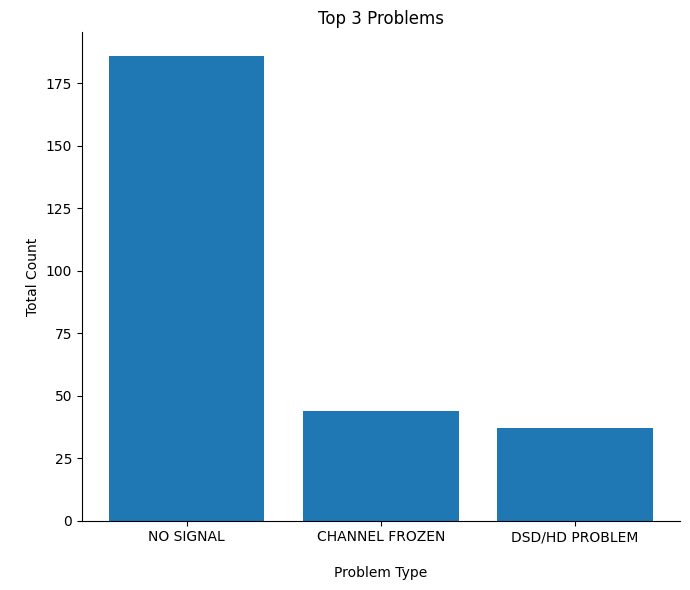

In [147]:
# @title Top 3 Problems
top_services = df_vendor_counts.groupby('SERVICE_TYPE')['count'].sum().reset_index()
top_services = top_services.sort_values(by='count', ascending=False).head(3)

plt.figure(figsize=(7, 6))
plt.bar(top_services['SERVICE_TYPE'], top_services['count'])
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xticks(ha='center')
plt.xlabel('\nProblem Type')
plt.ylabel('\nTotal Count')
plt.title('Top 3 Problems')
plt.tight_layout()
plt.show()

In [148]:
# Top 3 problems counts
print(top_services)

     SERVICE_TYPE  count
5       NO SIGNAL    186
0  CHANNEL FROZEN     44
2  DSD/HD PROBLEM     37


In [93]:
# @title Service Level Agreement (SLA)

# Convert date columns to datetime format
df_cs['CLOSED_DATE'] = pd.to_datetime(df_cs['CLOSED_DATE'], format='%d/%m/%Y %H:%M:%S')
df_cs['CREATED_DATE'] = pd.to_datetime(df_cs['CREATED_DATE'], format='%d/%m/%Y')

# Calculate the time difference in hours
df_cs['time_difference'] = (df_cs['CLOSED_DATE'] - df_cs['CREATED_DATE']).astype('timedelta64[h]')

# Add a column to indicate whether SLA was met
df_cs['SLA_MET'] = df_cs['time_difference'] <= 48

# Count the number of instances where SLA was met
sla_met_count = df_cs['SLA_MET'].sum()

print(sla_met_count)

202


Total SLA met is 202, now let's see SLA Compliance Percentage.

In [94]:


# Calculate SLA compliance percentage
sla_compliance_percentage = (df_cs['SLA_MET'].sum() / len(df)) * 100

# Print the SLA compliance percentage
print("SLA Compliance Percentage:", sla_compliance_percentage, "%")

SLA Compliance Percentage: 67.55852842809364 %


Let's visualize it with pie chart and barplot.

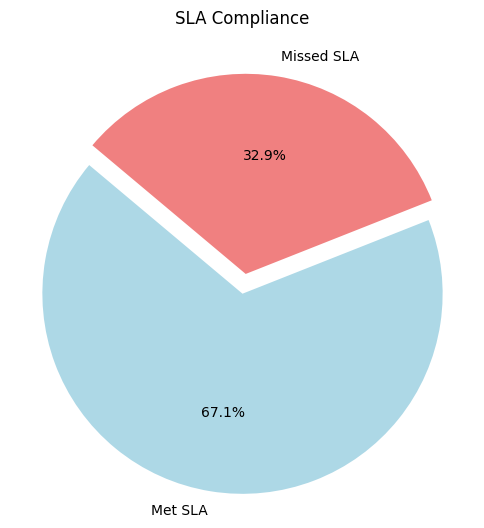

In [153]:
# Visualize SLA compliance using pie chart
labels = ['Met SLA', 'Missed SLA']
sizes = [sla_compliance_percentage, 100 - sla_compliance_percentage]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # To highlight the 'Met SLA' slice

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('SLA Compliance\n')
plt.show()

The pie chart depicting 'Met SLA vs Missed SLA' showcases a distribution of 67.1% for successful SLA compliance and 32.9% for situations that didn't meet the SLA. Moving forward, we'll delve into barplot visualization.

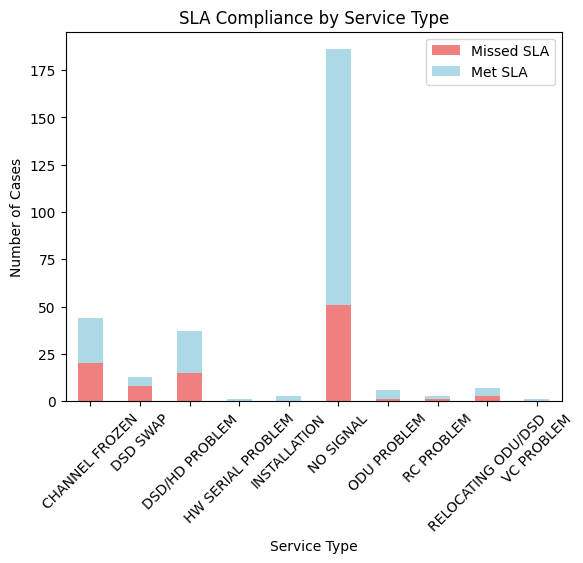

In [154]:
# Visualize SLA compliance using barplot
sla_compliance_percentage = (df_cs['SLA_MET'].sum() / len(df_cs)) * 100

# Group by service type and count SLA cases
sla_count_by_service = df_cs.groupby(['SERVICE_TYPE', 'SLA_MET']).size().unstack(fill_value=0)

# Create a bar chart for SLA compliance by service type
sla_count_by_service.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'])
plt.xlabel('Service Type')
plt.ylabel('Number of Cases')
plt.title('SLA Compliance by Service Type')
plt.xticks(rotation=45)
plt.legend(['Missed SLA', 'Met SLA'])
plt.show()

As we can see, the 'No Signal' service stands out with the highest met SLA percentage, yet it also registers the highest missed SLA percentage. Now, let's take a look on the detail.

In [112]:
# Calculate met and missed SLA counts by service type
sla_counts_by_service = df_cs.groupby(['SERVICE_TYPE', 'SLA_MET']).size().unstack(fill_value=0)
met_sla_counts = sla_counts_by_service[True]
missed_sla_counts = sla_counts_by_service[False]

In [149]:
# Create a new DataFrame to show service type, met sla counts, and missed sla counts
service_sla_counts_df = pd.DataFrame({
    'Service Type': met_sla_counts.index,
    'Met SLA Counts': met_sla_counts.values,
    'Missed SLA Counts': missed_sla_counts.reindex(met_sla_counts.index, fill_value=0).values
})

# Add the SLA Compliance Ratio column
service_sla_counts_df['SLA Compliance Ratio'] = service_sla_counts_df['Met SLA Counts'] / (service_sla_counts_df['Met SLA Counts'] + service_sla_counts_df['Missed SLA Counts'])

print(service_sla_counts_df)

         Service Type  Met SLA Counts  Missed SLA Counts  SLA Compliance Ratio
0      CHANNEL FROZEN              24                 20              0.545455
1            DSD SWAP               5                  8              0.384615
2      DSD/HD PROBLEM              22                 15              0.594595
3   HW SERIAL PROBLEM               1                  0              1.000000
4        INSTALLATION               3                  0              1.000000
5           NO SIGNAL             135                 51              0.725806
6         ODU PROBLEM               5                  1              0.833333
7          RC PROBLEM               2                  1              0.666667
8  RELOCATING ODU/DSD               4                  3              0.571429
9          VC PROBLEM               1                  0              1.000000


In [150]:
# Calculate the total counts of Met SLA and Missed SLA cases and ratio
total_met_sla_counts = service_sla_counts_df['Met SLA Counts'].sum()
total_missed_sla_counts = service_sla_counts_df['Missed SLA Counts'].sum()

sla_compliance_met = sla_compliance_percentage
sla_compliance_missed = 100 - sla_compliance_percentage

print("Total Met SLA Counts:", total_met_sla_counts, "Services")
print("Total Missed SLA Counts:", total_missed_sla_counts, "Services")
print("SLA Compliance Met Ratio:", sla_compliance_met, "%")
print("SLA Compliance Missed Ratio:", sla_compliance_missed, "%")
print("Total All Counts:", total_met_sla_counts +total_missed_sla_counts, "Services")

Total Met SLA Counts: 202 Services
Total Missed SLA Counts: 99 Services
SLA Compliance Met Ratio: 67.109634551495 %
SLA Compliance Missed Ratio: 32.890365448504994 %
Total All Counts: 301 Services


# Insights

1. **Vendor Counts Analysis:**
   - Vendor V03 has the highest count of service instances (136), followed by V01 (92) and V02 (73).
   - The distribution isn't balanced, indicating varying workloads among vendors.

2. **Service Type Distribution:**
   - "No Signal" is the most common service type with 186 instances, followed by "Channel Frozen" (44) and "DSD/HD Problem" (37).
   - Other service types have notably fewer reported occurrences.

3. **Top 3 Problems:**
   - "No Signal" (186 occurrences), "Channel Frozen" (44), and "DSD/HD Problem" (37) are the most commonly reported issues.

4. **Vendor Analysis:**
   - Vendor V03 handles the highest workload (136 occurrences), exceeding V01 (92) and V02 (73).
   - V03 appears to have the highest workload among vendors.

5. **Service Level Agreement (SLA) Analysis:**
   - "No Signal" and "DSD/HD Problem" have relatively higher SLA compliance ratios of 72.58% and 59.46% respectively.
   - "DSD Swap" and "Relocating ODU/DSD" have lower SLA compliance ratios, indicating areas for improvement.

6. **Overall SLA Performance:**
   - Out of a total of 301 services, 202 services have met SLAs, while 99 services missed SLAs.
   - The overall SLA compliance met ratio is 67.11%, while the missed ratio is 32.89%.

**Actionable Recommendations:**

- **Optimize Vendor Allocation:**
  Equitably distribute tasks among vendors, particularly addressing the heavier load on Vendor V03. This could enhance efficiency and reduce response times.

- **Prioritize Frequent Problems:**
  Address "No Signal," "Channel Frozen," and "DSD/HD Problem" promptly due to their high occurrence rates, improving customer satisfaction.

- **Enhance SLA Compliance:**
  Focus on enhancing SLA compliance for "DSD Swap" and "Relocating ODU/DSD" to align with desired levels and maintain service quality.

- **Resource Boost for V03:**
  Provide additional resources and support to Vendor V03 to manage the substantial service occurrences, ensuring prompt resolutions.

- **Root Cause Analysis:**
  Conduct in-depth analyses of "No Signal," "Channel Frozen," and "DSD/HD Problem" to identify underlying issues and preempt future occurrences.

- **Monitor SLAs Proactively:**
  Implement robust SLA monitoring mechanisms to track trends, pinpoint improvement areas, and replicate successful interventions.

- **Transparent Customer Communication:**
  Communicate effectively with customers regarding service progress, expected resolutions, and challenges faced. This transparency boosts satisfaction.